# Import Moduls 

In [113]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np



# Data Preparation

### 1. Merge data to have one complet Dataframe

In [160]:
pd.set_option('display.max_info_columns', 1000)

In [114]:
df_diabete = pd.read_csv('data/diabetic_data.csv')
df_IDS = pd.read_csv('data/IDS_mapping.csv')

In [115]:
df_diabete.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [116]:
df_IDS.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [117]:
df_IDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   admission_type_id  65 non-null     object
 1   description        62 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [118]:
df_diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [119]:
# on vérifie les missing values

df_IDS['admission_type_id'].isnull().sum()

np.int64(2)

In [120]:
df_IDS = df_IDS.dropna(subset=['admission_type_id'])

df_IDS['admission_type_id'].isnull().sum()

np.int64(0)

In [121]:
df_IDS['admission_type_id'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', 'discharge_disposition_id',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '30', '27', '28', '29',
       'admission_source_id'], dtype=object)

In [122]:
# on supprime les valeurs non numériques dans la colonne admission_type_id

df_IDS = df_IDS[pd.to_numeric(df_IDS['admission_type_id'], errors='coerce').notnull()]

df_IDS['admission_type_id'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '30', '27', '28', '29'], dtype=object)

In [123]:
# on doit modifier le type de la colonne admission_source_id pour pouvoir merger les deux df :

df_IDS['admission_type_id'] = df_IDS['admission_type_id'].astype('int64')

In [124]:
df = df_diabete.merge(
    df_IDS,
    on='admission_type_id',      
    how='left'                   
)

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,NaN
1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,Discharged/transferred to home with home healt...
2,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,Transfer from another health care facility
3,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Emergency
4,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Discharged to home


### 2. Feature Engineering

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305298 entries, 0 to 305297
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              305298 non-null  int64 
 1   patient_nbr               305298 non-null  int64 
 2   race                      305298 non-null  object
 3   gender                    305298 non-null  object
 4   age                       305298 non-null  object
 5   weight                    305298 non-null  object
 6   admission_type_id         305298 non-null  int64 
 7   discharge_disposition_id  305298 non-null  int64 
 8   admission_source_id       305298 non-null  int64 
 9   time_in_hospital          305298 non-null  int64 
 10  payer_code                305298 non-null  object
 11  medical_specialty         305298 non-null  object
 12  num_lab_procedures        305298 non-null  int64 
 13  num_procedures            305298 non-null  int64 
 14  num_

In [126]:
# pourquoi age est un object ?

In [127]:
df.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [128]:
# on créer la nouvelle colonne numérique age en mettant le milieu de chaque intervalle

age_mapping = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}

df['age_num'] = df['age'].map(age_mapping)

# Vérification
df[['age', 'age_num']].head()

,age,age_num
0,[0-10),5
1,[0-10),5
2,[0-10),5
3,[10-20),15
4,[10-20),15


In [129]:
# on supprime l'ancienne colonne age

df.drop(columns=['age'], inplace=True)

In [130]:
# --- Paramètres ajustables ---
MISSING_THRESHOLD = 0.6          # >60% manquants → candidate à suppression
NEAR_CONST_THRESHOLD = 0.99      # 99% de la même valeur → quasi-constante
HC_ABS_THRESHOLD = 100           # >100 modalités pour une catégorielle → haute cardinalité
HC_REL_THRESHOLD = 0.5           # >50% de valeurs uniques (vs n lignes) → haute cardinalité
ID_REL_THRESHOLD = 0.95          # >95% de valeurs uniques → colonnes type ID



# --- Copier le df et traiter '?' comme manquant ---
df_ = df.replace('?', np.nan).copy()
n_rows = len(df_)

# Stats de base
missing_frac = df_.isna().mean()
nunique = df_.nunique(dropna=True)
dtype = df_.dtypes

# Colonnes constantes / quasi-constantes
constant_cols = [c for c in df_.columns if nunique[c] <= 1]
def top_ratio(s: pd.Series) -> float:
    s = s.dropna()
    if s.empty: 
        return 1.0
    return s.value_counts(normalize=True).iloc[0]

top_ratios = df_.apply(top_ratio)
near_constant_cols = [c for c in df_.columns 
                      if c not in constant_cols and top_ratios[c] >= NEAR_CONST_THRESHOLD]

# Haute cardinalité (catégorielles seulement)
is_object = dtype.apply(lambda t: t == 'object')
high_card_cols = [c for c in df_.columns if is_object[c] and 
                  (nunique[c] >= HC_ABS_THRESHOLD or nunique[c] >= HC_REL_THRESHOLD * n_rows)]

# Colonnes "ID-like" (beaucoup d'uniques)
id_like_cols = [c for c in df_.columns if nunique[c] >= ID_REL_THRESHOLD * n_rows]

# Colonnes dupliquées (même contenu)
dup_mask = df_.T.duplicated()
duplicate_cols = df_.columns[dup_mask].tolist()

# Colonnes à fort taux de NaN
high_missing_cols = missing_frac[missing_frac >= MISSING_THRESHOLD].index.tolist()

# Résumé colonne par colonne
summary = pd.DataFrame({
    'dtype': dtype.astype(str),
    'missing_frac': missing_frac.round(4),
    'nunique': nunique,
    'top_ratio': top_ratios.round(4)
}).sort_values(['missing_frac','top_ratio'], ascending=False)

print("=== Résumé des colonnes ===")
display(summary)

print("\n=== Listes de candidates potentielles à supprimer (à valider métier) ===")
print(f"- Taux de NaN >= {MISSING_THRESHOLD*100:.0f}% :", high_missing_cols)
print("- Constantes :", constant_cols)
print(f"- Quasi-constantes (top_ratio >= {NEAR_CONST_THRESHOLD}):", near_constant_cols)
print(f"- Haute cardinalité (object & nunique >= {HC_ABS_THRESHOLD} ou >= {HC_REL_THRESHOLD*100:.0f}% des lignes):", high_card_cols)
print(f"- Colonnes type ID (nunique >= {ID_REL_THRESHOLD*100:.0f}% des lignes):", id_like_cols)
print("- Colonnes dupliquées :", duplicate_cols)

# Exemple de liste "union" (à passer en revue avant suppression)
candidates = sorted(set(high_missing_cols + constant_cols + near_constant_cols + 
                        high_card_cols + id_like_cols + duplicate_cols))
print("\n→ Candidates (à inspecter avant drop) :", candidates)


=== Résumé des colonnes ===


,dtype,missing_frac,nunique,top_ratio
weight,object,0.9686,9,0.4179
max_glu_serum,object,0.9475,3,0.4858
A1Cresult,object,0.8328,3,0.4828
medical_specialty,object,0.4908,72,0.2824
payer_code,object,0.3956,17,0.5274
race,object,0.0223,5,0.7649
description,object,0.0173,23,0.1800
diag_3,object,0.0140,789,0.1152
diag_2,object,0.0035,748,0.0666
diag_1,object,0.0002,716,0.0674



=== Listes de candidates potentielles à supprimer (à valider métier) ===
- Taux de NaN >= 60% : ['weight', 'max_glu_serum', 'A1Cresult']
- Constantes : ['examide', 'citoglipton']
- Quasi-constantes (top_ratio >= 0.99): ['nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
- Haute cardinalité (object & nunique >= 100 ou >= 50% des lignes): ['diag_1', 'diag_2', 'diag_3']
- Colonnes type ID (nunique >= 95% des lignes): []
- Colonnes dupliquées : ['citoglipton']

→ Candidates (à inspecter avant drop) : ['A1Cresult', 'acarbose', 'acetohexamide', 'chlorpropamide', 'citoglipton', 'diag_1', 'diag_2', 'diag_3', 'examide', 'glimepiride-pioglitazone', 'glipizide-metformin', 'glyburide-metformin', 'max_glu_serum', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'miglitol', 'nateglinide', 'tolazamide', 

In [131]:
df.examide.unique()

array(['No'], dtype=object)

In [132]:
df.citoglipton.unique()

array(['No'], dtype=object)

In [133]:
df.A1Cresult.unique()

array([nan, '>7', '>8', 'Norm'], dtype=object)

In [134]:
# on traite A1Cresult au lieu de suppression car colonne importante pour le diabète car elle représente le taux de glucose sur 3 mois
df['A1Cresult_cat'] = df['A1Cresult'].replace({
    'Norm': 0,
    '>7': 1,
    '>8': 2
})
df['A1Cresult_cat'] = df['A1Cresult_cat'].fillna(3)  # 3 = NotMeasured / None
df = df.drop(columns=['A1Cresult'])  # on garde la nouvelle colonne


/var/folders/77/y1zxl25s54s86l_9htm0lsxr0000gn/T/ipykernel_40197/2075765277.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Cresult_cat'] = df['A1Cresult'].replace({


In [135]:
df['A1Cresult_cat'].value_counts(normalize=True)

A1Cresult_cat
3.0    0.832773
2.0    0.080734
0.0    0.049034
1.0    0.037458
Name: proportion, dtype: float64

In [136]:
# on supprime les colonnes inutiles 

drop_cols = [
    # constantes ou quasi-constantes
    'examide', 'citoglipton', 'acetohexamide', 'tolbutamide', 'troglitazone',
    'tolazamide', 'miglitol', 'chlorpropamide', 'nateglinide', 'acarbose',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone',

     # trop de valeurs manquantes
    'weight', 'max_glu_serum',
    
    # Identifiants 
    'encounter_id', 'patient_nbr'
]
df.drop(columns=drop_cols, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305298 entries, 0 to 305297
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      305298 non-null  object 
 1   gender                    305298 non-null  object 
 2   admission_type_id         305298 non-null  int64  
 3   discharge_disposition_id  305298 non-null  int64  
 4   admission_source_id       305298 non-null  int64  
 5   time_in_hospital          305298 non-null  int64  
 6   payer_code                305298 non-null  object 
 7   medical_specialty         305298 non-null  object 
 8   num_lab_procedures        305298 non-null  int64  
 9   num_procedures            305298 non-null  int64  
 10  num_medications           305298 non-null  int64  
 11  number_outpatient         305298 non-null  int64  
 12  number_emergency          305298 non-null  int64  
 13  number_inpatient          305298 non-null  i

In [137]:
df.diag_1.unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

### 3. Cas des colonnes `diag_1`, `diag_2`, `diag_3`

###  Description
Les colonnes **`diag_1`**, **`diag_2`** et **`diag_3`** correspondent aux **diagnostics médicaux** enregistrés lors de chaque hospitalisation d’un patient.  
- **`diag_1`** → Diagnostic **principal**, c’est la raison principale de l’admission.  
- **`diag_2`** → Diagnostic **secondaire n°1**, une maladie associée détectée pendant le séjour.  
- **`diag_3`** → Diagnostic **secondaire n°2**, une autre condition médicale pertinente.  

Chaque diagnostic est codé selon la **classification ICD-9** (*International Classification of Diseases, 9th Revision*), un système de codification standard utilisé dans le monde médical pour classifier les maladies, symptômes et blessures.

Exemple :
| Colonne | Valeur | Interprétation |
|----------|--------|----------------|
| `diag_1` | `250.83` | Diabète avec complications spécifiques |
| `diag_2` | `401.9` | Hypertension essentielle |
| `diag_3` | `414.01` | Athérosclérose coronarienne |

---

###  Qu’est-ce que l’ICD-9 ?
L’**ICD-9** classe les maladies selon des **plages de codes** correspondant à de grands groupes pathologiques.  
Chaque plage numérique regroupe des types de maladies similaires.

| Plage ICD-9 | Catégorie principale |
|--------------|----------------------|
| 001–139 | Maladies infectieuses et parasitaires |
| 140–239 | Néoplasmes (tumeurs, cancers, etc.) |
| 240–279 | Maladies endocriniennes, nutritionnelles et métaboliques (ex : diabète) |
| 280–289 | Maladies du sang et des organes hématopoïétiques |
| 290–319 | Troubles mentaux |
| 320–389 | Maladies du système nerveux |
| 390–459 | Maladies du système circulatoire |
| 460–519 | Maladies du système respiratoire |
| 520–579 | Maladies du système digestif |
| 580–629 | Maladies du système génito-urinaire |
| 630–679 | Grossesse et accouchement |
| 680–709 | Maladies de la peau |
| 710–739 | Maladies musculosquelettiques |
| 740–759 | Anomalies congénitales |
| 760–779 | Conditions périnatales |
| 780–799 | Symptômes et diagnostics mal définis |
| 800–999 | Blessures et empoisonnements |
| Vxx / Exx | Facteurs externes et causes d’accidents |

---

###  Traitement prévu 
Les codes ICD-9 sont **trop détaillés et nombreux** pour être utilisés directement dans un modèle de Machine Learning.  
Nous allons donc les **simplifier** en les regroupant par grandes familles de pathologies :

1. **Remplacer** chaque code ICD-9 par une **catégorie médicale** (ex : `250.83` → *Diabetes*, `401.9` → *Circulatory system*).  
2. **Créer une catégorie “Unknown”** pour les valeurs manquantes (`?`).  
3. **Conserver les trois colonnes** (`diag_1`, `diag_2`, `diag_3`) sous forme **catégorielle simplifiée**.  

 Cela réduit la complexité des données (moins de catégories uniques) tout en **préservant la valeur clinique** pour le modèle.  
 De plus, cette simplification rendra **l’encodage beaucoup plus simple et rapide**, car le nombre de modalités distinctes sera fortement réduit.


In [138]:
#Fonction pour tester si une valeur est convertible en float

def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

#Identifier les lignes où AU MOINS une des 3 colonnes n'est pas convertible
mask_invalid = (
    (~df['diag_1'].apply(is_float)) | 
    (~df['diag_2'].apply(is_float)) | 
    (~df['diag_3'].apply(is_float))
)

#Nombre de lignes à supprimer
nb_dropped = mask_invalid.sum()

#Supprimer ces lignes
df = df[~mask_invalid].copy()

#Convertir les colonnes en float
df[['diag_1', 'diag_2', 'diag_3']] = df[['diag_1', 'diag_2', 'diag_3']].astype(float)

#Afficher le nombre de lignes supprimées
print(f" {nb_dropped} lignes supprimées car non convertibles en float.")
print(f"➡️ Nouveau nombre de lignes dans le DataFrame : {len(df)}")


#Fonction pour mapper un code ICD9 vers une catégorie générale
def map_diag(diag):
    """
    Convertit un code ICD9 (sous forme de texte ou float) en catégorie diagnostique large.
    """
    # Gérer les valeurs manquantes
    if pd.isna(diag):
        return 'Unknown'
    
    try:
        diag = float(diag)
    except ValueError:
        return 'Unknown'
    
    # Classification principale selon les plages ICD9
    if 1 <= diag <= 139:
        return 'Infectious diseases'
    elif 140 <= diag <= 239:
        return 'Neoplasms'
    elif 240 <= diag <= 249:
        return 'Endocrine/metabolic'
    elif 250 <= diag < 251:
        return 'Diabetes'  # Par sécurité, regrouper tous les codes "250.xx"
    elif 252 <= diag <= 279:
        return 'Endocrine/metabolic'
    elif 280 <= diag <= 289:
        return 'Blood diseases'
    elif 290 <= diag <= 319:
        return 'Mental disorders'
    elif 320 <= diag <= 389:
        return 'Nervous system'
    elif 390 <= diag <= 459:
        return 'Circulatory system'
    elif 460 <= diag <= 519:
        return 'Respiratory system'
    elif 520 <= diag <= 579:
        return 'Digestive system'
    elif 580 <= diag <= 629:
        return 'Genitourinary system'
    elif 630 <= diag <= 679:
        return 'Pregnancy'
    elif 680 <= diag <= 709:
        return 'Skin disease'
    elif 710 <= diag <= 739:
        return 'Musculoskeletal system'
    elif 740 <= diag <= 759:
        return 'Congenital anomalies'
    elif 760 <= diag <= 779:
        return 'Perinatal period'
    elif 780 <= diag <= 799:
        return 'Symptoms'
    elif 800 <= diag <= 999:
        return 'Injury/poisoning'
    
    else:
        return 'Other'


#Application du mapping sur les 3 colonnes
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].apply(map_diag)

#Vérification
print("\nAperçu après transformation :")
print(df[['diag_1', 'diag_2', 'diag_3']].head())


 29766 lignes supprimées car non convertibles en float.
➡️ Nouveau nombre de lignes dans le DataFrame : 275532

Aperçu après transformation :
                 diag_1    diag_2               diag_3
3   Endocrine/metabolic  Diabetes  Endocrine/metabolic
4   Endocrine/metabolic  Diabetes  Endocrine/metabolic
5   Endocrine/metabolic  Diabetes  Endocrine/metabolic
9   Infectious diseases  Diabetes   Circulatory system
10  Infectious diseases  Diabetes   Circulatory system


In [139]:
df.diag_1.value_counts()

diag_1
Circulatory system        85890
Respiratory system        29739
Digestive system          25911
Diabetes                  22017
Symptoms                  21036
Injury/poisoning          16209
Genitourinary system      14526
Musculoskeletal system    13662
Neoplasms                  9660
Infectious diseases        8031
Endocrine/metabolic        7407
Skin disease               6957
Mental disorders           6036
Nervous system             3387
Blood diseases             3147
Pregnancy                  1728
Congenital anomalies        147
Other                        42
Name: count, dtype: int64

In [140]:
df.diag_2.value_counts()

diag_2
Circulatory system        88143
Diabetes                  33957
Respiratory system        29559
Endocrine/metabolic       23112
Genitourinary system      22755
Symptoms                  12810
Digestive system          11298
Skin disease              10302
Blood diseases             8205
Mental disorders           7416
Neoplasms                  6813
Injury/poisoning           6078
Infectious diseases        5256
Musculoskeletal system     4701
Nervous system             3630
Pregnancy                  1164
Congenital anomalies        312
Other                        21
Name: count, dtype: int64

In [141]:
df.diag_3.value_counts()

diag_3
Circulatory system        86436
Diabetes                  48978
Endocrine/metabolic       26757
Respiratory system        19845
Genitourinary system      18492
Symptoms                  13026
Digestive system          10464
Mental disorders           9111
Skin disease               7296
Blood diseases             7128
Injury/poisoning           5607
Infectious diseases        5445
Musculoskeletal system     5400
Neoplasms                  5247
Nervous system             5079
Pregnancy                   918
Congenital anomalies        282
Other                        21
Name: count, dtype: int64

Top 10 des catégories les plus fréquentes :
Circulatory system        31.51
Diabetes                  12.70
Respiratory system         9.57
Endocrine/metabolic        6.93
Genitourinary system       6.75
Digestive system           5.77
Symptoms                   5.67
Injury/poisoning           3.37
Skin disease               2.97
Musculoskeletal system     2.87
Name: count, dtype: float64


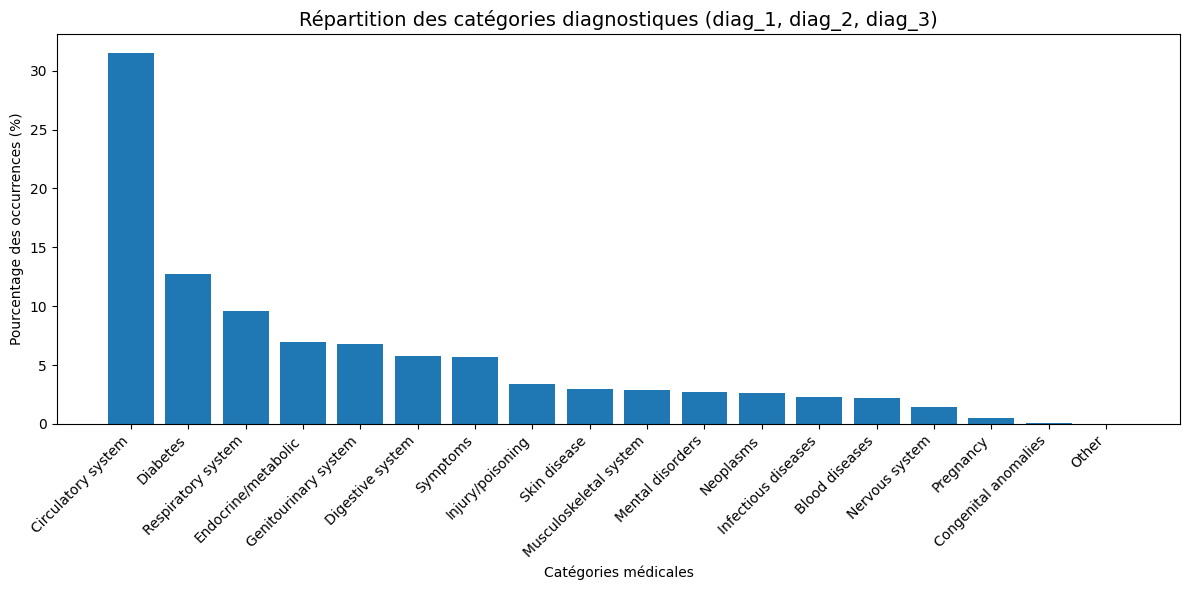

In [142]:

all_diags = pd.concat([df['diag_1'], df['diag_2'], df['diag_3']], ignore_index=True)


diag_counts = all_diags.value_counts().sort_values(ascending=False)


diag_percent = (diag_counts / diag_counts.sum() * 100).round(2)


plt.figure(figsize=(12, 6))
plt.bar(diag_percent.index, diag_percent.values)
plt.xticks(rotation=45, ha='right')
plt.title("Répartition des catégories diagnostiques (diag_1, diag_2, diag_3)", fontsize=14)
plt.ylabel("Pourcentage des occurrences (%)")
plt.xlabel("Catégories médicales")
plt.tight_layout()


print("Top 10 des catégories les plus fréquentes :")
print(diag_percent.head(10))

plt.show()


In [143]:
df.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,description,age_num,A1Cresult_cat
3,Caucasian,Female,1,1,7,3,?,?,59,0,...,No,No,No,Up,Ch,Yes,>30,Emergency,15,3.0
4,Caucasian,Female,1,1,7,3,?,?,59,0,...,No,No,No,Up,Ch,Yes,>30,Discharged to home,15,3.0
5,Caucasian,Female,1,1,7,3,?,?,59,0,...,No,No,No,Up,Ch,Yes,>30,Physician Referral,15,3.0
9,Caucasian,Male,1,1,7,2,?,?,44,1,...,No,No,No,Up,Ch,Yes,NO,Emergency,35,3.0
10,Caucasian,Male,1,1,7,2,?,?,44,1,...,No,No,No,Up,Ch,Yes,NO,Discharged to home,35,3.0


In [144]:
df.discharge_disposition_id.unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23, 20, 15,  9, 24, 28, 19, 27])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275532 entries, 3 to 305297
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      275532 non-null  object 
 1   gender                    275532 non-null  object 
 2   admission_type_id         275532 non-null  int64  
 3   discharge_disposition_id  275532 non-null  int64  
 4   admission_source_id       275532 non-null  int64  
 5   time_in_hospital          275532 non-null  int64  
 6   payer_code                275532 non-null  object 
 7   medical_specialty         275532 non-null  object 
 8   num_lab_procedures        275532 non-null  int64  
 9   num_procedures            275532 non-null  int64  
 10  num_medications           275532 non-null  int64  
 11  number_outpatient         275532 non-null  int64  
 12  number_emergency          275532 non-null  int64  
 13  number_inpatient          275532 non-null  int64 

In [146]:
len(df)

275532

In [147]:
df.readmitted.unique()

array(['>30', 'NO', '<30'], dtype=object)

In [148]:
# Identifier les colonnes contenant au moins un '?'


cols_with_question = {}

for col in df.columns:
    if df[col].astype(str).str.contains(r'\?', regex=True).any():
        cols_with_question[col] = df[col].astype(str).str.count(r'\?').sum()

# Afficher le résultat
if cols_with_question:
    print("⚠️ Colonnes contenant des '?' :")
    for col, n in cols_with_question.items():
        print(f"- {col}: {int(n)} occurrences")
else:
    print("✅ Aucune valeur '?' détectée dans le DataFrame.")


⚠️ Colonnes contenant des '?' :
- race: 6186 occurrences
- payer_code: 108348 occurrences
- medical_specialty: 135993 occurrences


In [149]:
cols_qmark = ['race', 'payer_code', 'medical_specialty']

# Remplacer '?' par NaN
df = df.replace('?', np.nan)


# Taux de NaN
na_rate = (df[cols_qmark].isna().mean().sort_values(ascending=False) * 100).round(2)
display(na_rate)

medical_specialty    49.36
payer_code           39.32
race                  2.25
dtype: float64

In [150]:
# on va simplement supprimer les lignes avec des valeurs manquantes dans la colonne race, 
#car c'est une colonne importante dans le sens ou c'est un facteur medical pertinant 
#(inégalité de soins de santé, profil du patient etc...)

before = len(df)

df = df.dropna(subset=['race'])

after = len(df)

removed = before - after


print(f"Lignes supprimées pour NaN dans 'race' : {removed}")


Lignes supprimées pour NaN dans 'race' : 6186


In [151]:
df.race.unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [152]:
# pour la colonne payer_code, trop de NaN et pas pertinent pour l'analyse médicale, on supprime la colonne
df = df.drop(columns=['payer_code'])

In [153]:
# pour la colonne medical_specialty, on remplace les NaN par 'Unknown'
df['medical_specialty'] = df['medical_specialty'].fillna('Unknown')
df.medical_specialty.unique()

array(['Unknown', 'InternalMedicine', 'Family/GeneralPractice',
       'Cardiology', 'Surgery-General', 'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Obsterics&Gynecology-GynecologicOnco',
       'ObstetricsandGynecology', 'Otolaryngology',
       'Pediatrics-Endocrinology', 'Surgery-Colon&Rectal',
       'Surgery-Neuro', 'Endocrinology', 'Hematology/Oncology', 'Urology',
       'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Pediatrics', 'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-CriticalCare', 'Pediatrics-Hematology-Oncology',
       'Podiatry', 'Gynecology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Psychology', 'Ophthalmology',
       'Surgery-Pediatric', 'InfectiousDiseases',
       'PhysicalMedicineandRehabilitation', 'Anesthe

In [154]:
unknown_rate = (df['medical_specialty'] == 'Unknown').mean() * 100
print(f"Pourcentage de 'Unknown' dans 'medical_specialty' : {unknown_rate:.2f}%")


Pourcentage de 'Unknown' dans 'medical_specialty' : 49.26%


In [155]:
# beaucoup trop de bruit dans cette colonne, + environ 50% de NaN, on la supprime

df = df.drop(columns=['medical_specialty'])

In [165]:
df.info(verbose=True, max_cols=10_000, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
Index: 269346 entries, 3 to 305297
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      269346 non-null  object 
 1   gender                    269346 non-null  object 
 2   admission_type_id         269346 non-null  int64  
 3   discharge_disposition_id  269346 non-null  int64  
 4   admission_source_id       269346 non-null  int64  
 5   time_in_hospital          269346 non-null  int64  
 6   num_lab_procedures        269346 non-null  int64  
 7   num_procedures            269346 non-null  int64  
 8   num_medications           269346 non-null  int64  
 9   number_outpatient         269346 non-null  int64  
 10  number_emergency          269346 non-null  int64  
 11  number_inpatient          269346 non-null  int64  
 12  diag_1                    269346 non-null  object 
 13  diag_2                    269346 non-null  object

In [164]:
df.description

3                                                 Emergency
4                                        Discharged to home
5                                        Physician Referral
9                                                 Emergency
10                                       Discharged to home
                                ...                        
305293    Discharged/transferred to another short term h...
305294                                      Clinic Referral
305295                                            Emergency
305296                                   Discharged to home
305297                                   Physician Referral
Name: description, Length: 269346, dtype: object

In [167]:
# Liste des colonnes liées aux médicaments dans ton dataset
drug_cols = [
    'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide',
    'pioglitazone', 'rosiglitazone', 'insulin'
]

# Calcul du ratio de la modalité dominante pour chaque colonne
low_var_report = {
    col: df[col].value_counts(normalize=True).iloc[0] for col in drug_cols
}

# Conversion en DataFrame pour un affichage clair
low_var_df = pd.DataFrame.from_dict(low_var_report, orient='index', columns=['top_ratio']).sort_values('top_ratio', ascending=False)

print(" Taux de la modalité dominante pour chaque médicament :")
display(low_var_df)

# Identification des colonnes quasi-constantes (seuil configurable, ici 0.99)
threshold = 0.99
quasi_constant_drugs = low_var_df[low_var_df['top_ratio'] >= threshold].index.tolist()

print(f"\n Colonnes médicamenteuses quasi-constantes (>{threshold*100:.0f}% d'une seule valeur) :")
print(quasi_constant_drugs if quasi_constant_drugs else "Aucune")


 Taux de la modalité dominante pour chaque médicament :


,top_ratio
repaglinide,0.984139
glimepiride,0.948598
rosiglitazone,0.937092
pioglitazone,0.928382
glyburide,0.895658
glipizide,0.874919
metformin,0.805540
insulin,0.464960



 Colonnes médicamenteuses quasi-constantes (>99% d'une seule valeur) :
Aucune


In [168]:
# on supprime celles avec trop de variance

cols_medic_to_drop = ['repaglinide', 'rosiglitazone', 'pioglitazone', 'glyburide', 'glimepiride']
df = df.drop(columns=cols_medic_to_drop)

In [170]:
df = df.drop(columns=['description']) 

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269346 entries, 3 to 305297
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      269346 non-null  object 
 1   gender                    269346 non-null  object 
 2   admission_type_id         269346 non-null  int64  
 3   discharge_disposition_id  269346 non-null  int64  
 4   admission_source_id       269346 non-null  int64  
 5   time_in_hospital          269346 non-null  int64  
 6   num_lab_procedures        269346 non-null  int64  
 7   num_procedures            269346 non-null  int64  
 8   num_medications           269346 non-null  int64  
 9   number_outpatient         269346 non-null  int64  
 10  number_emergency          269346 non-null  int64  
 11  number_inpatient          269346 non-null  int64  
 12  diag_1                    269346 non-null  object 
 13  diag_2                    269346 non-null  object

### 4. Save Dataset for the ML Part

In [157]:
#df.to_csv("data/diabetes_clean.csv", index=False)

In [158]:
#df.repaglinide.unique()

In [159]:
# compter combien de 'Yes', 'Up', 'Steady' et 'Down' dans la colonne repaglinide

#df['repaglinide'].value_counts()